In [14]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.12.1


In [2]:
torch.cuda.is_available()

False

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,Y_train,Y_test = tts(X,y,test_size=0.2)
X_train.shape,Y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [121]:
def plot_preds(test_in=X_test,test_out=Y_test,preds=None):

        plt.scatter(test_in,test_out,c='g',label='Test')
        plt.scatter(test_in,preds,c='y',label='Preds')
        plt.legend()
        plt.show()

# Building a model

In [15]:
# Create a Linear Regression model class
class LinearRegressionModel(torch.nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 


## PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.They are:

- torch.nn
- torch.optim
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

In [49]:
torch.manual_seed(0)

model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [50]:
model0.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

## Making predictions using torch.inference_mode()



In [51]:
# Make predictions with model
with torch.inference_mode():
    Y_preds = model0(X_test)

print(Y_preds)

tensor([[ 1.1551],
        [ 0.8469],
        [ 1.0318],
        [ 0.5079],
        [-0.1393],
        [-0.2010],
        [ 0.4771],
        [ 0.4154],
        [ 0.7853],
        [ 1.0010]])


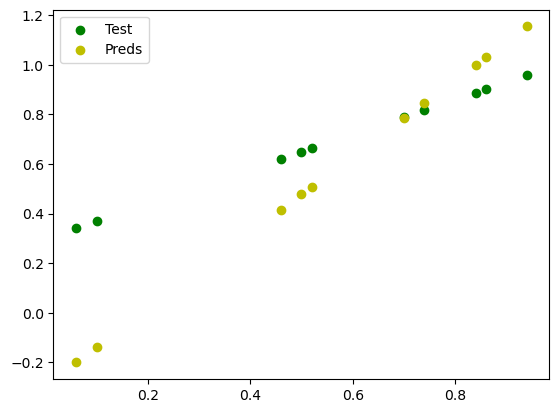

In [52]:
plot_preds(preds=Y_preds)

# Training & Testing Loops

## Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe. And that's a **loss function** as well as an **optimizer**

In [53]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model0.parameters(),lr=0.01)


## Creating an optimization loop in PyTorch

It's now time to create a training loop (and testing loop). The training loop involves the model going through the training data and learning the relationships between the features and labels . The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

In [58]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 450

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    ### Training
    # Put model in training mode (this is the default state of a model)
    model0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, Y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()


    ### Testing
    # Put the model in evaluation mode
    model0.eval()
    with torch.inference_mode():

        # 1. Forward pass on test data
        test_pred = model0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred,Y_test.type(torch.float)) 

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.003983755595982075 | MAE Test Loss: 0.0033635019790381193 
Epoch: 10 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 20 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 30 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 40 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 50 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 60 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 70 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 80 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 90 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 100 | MAE Train Loss: 0.010661350563168526 | MAE Test Loss: 0.001404050039127469 
Epoch: 110 | MAE Train Loss: 0.

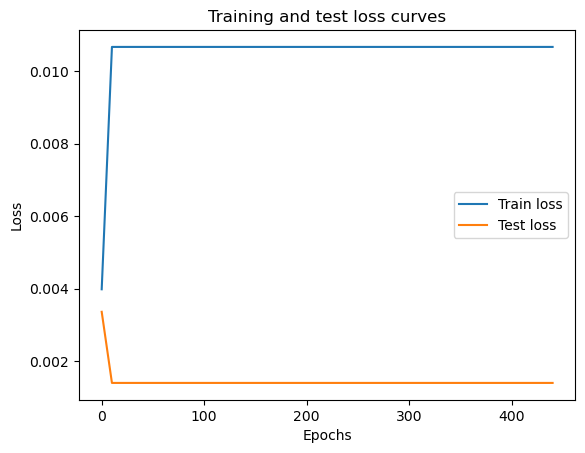

In [59]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [60]:
print(model0.state_dict())
print(weight,bias)

OrderedDict([('weights', tensor([0.7060])), ('bias', tensor([0.3078]))])
0.7 0.3


In [61]:
model0.eval()

with torch.inference_mode():
    y_preds = model0(X_test)
    
y_preds

tensor([[0.9715],
        [0.8303],
        [0.9150],
        [0.6750],
        [0.3784],
        [0.3502],
        [0.6608],
        [0.6326],
        [0.8021],
        [0.9009]])

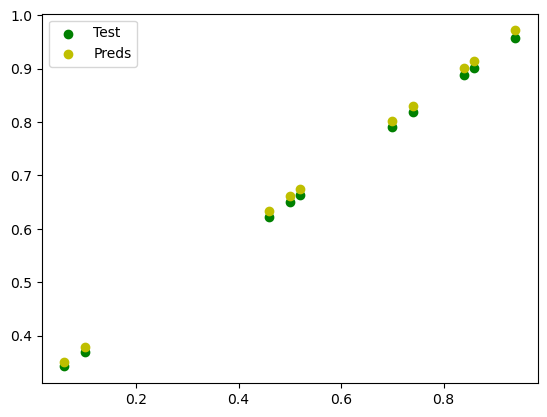

In [62]:
plot_preds(preds=y_preds)

# Saving & Loading a PyTorch Models

For saving and loading models in PyTorch, there are three main methods you should be aware of:

torch.save -> Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.

torch.load -> Uses pickle 's unpickling features to deserialize and load pickled Python object.

torch.nn.Module.load_state_dict -> Loads a model's parameter dictionary ( model.state_dict() ) using a saved state_dict() object.

## Saving

The recommended way for saving and loading a model for inference (making predictions) is
by saving and loading a model's state_dict() .

In [63]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model0.pth


## Loading

In [67]:
loaded_model0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [70]:
loaded_model0.eval()

with torch.inference_mode():
    predz = loaded_model0(X_test)

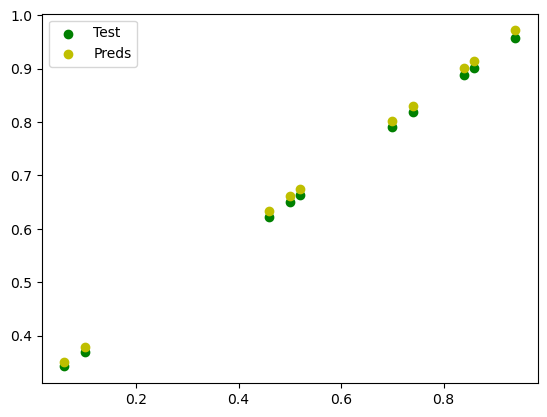

In [71]:
plot_preds(preds=predz)

# Repeating the process with device agnostic code and proper functions

In [216]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f" Using device: {device}")

 Using device: cpu


In [217]:
torch.manual_seed(0)
X = torch.arange(0,10,0.125).unsqueeze(dim=1)
y = 0.5 * X + 10

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)
X_test.shape

torch.Size([16, 1])

In [218]:
class LinearRegression2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(0)
model1 = LinearRegression2()
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
             ('linear_layer.bias', tensor([0.5364]))])

automatically creates a state_dict with weight and bias

In [219]:
model1.to(device)
next(model1.parameters()).device

device(type='cpu')

In [220]:
loss_fn = nn.L1Loss()

optimiser = torch.optim.SGD(params=model1.parameters(),lr=0.01)

In [221]:
torch.manual_seed(0)
## Training and testing it
train_loss_vals = []
test_loss_vals = []
epochs = 2500

for epoch in range(epochs):
    model1.train()
    
    # Forward pass
    preds = model1(X_train)
    
    #calculate loss
    loss = loss_fn(preds,y_train)
    train_loss_vals.append(loss.detach().numpy())
    #zero optimiser
    optimiser.zero_grad()
    
    #back propagation
    loss.backward()
    
    #optimiser step
    optimiser.step()
    
    model1.eval()
    with torch.inference_mode():
        y_preds = model1(X_test)
        test_loss = loss_fn(y_preds,y_test)
        test_loss_vals.append(test_loss.detach().numpy())
        
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Trains loss: {loss} | Test loss: {test_loss}')
    
    

Epoch: 0 | Trains loss: 11.902863502502441 | Test loss: 11.962423324584961
Epoch: 100 | Trains loss: 3.7256977558135986 | Test loss: 3.5346240997314453
Epoch: 200 | Trains loss: 3.551048517227173 | Test loss: 3.368619918823242
Epoch: 300 | Trains loss: 3.3764121532440186 | Test loss: 3.2028920650482178
Epoch: 400 | Trains loss: 3.201779365539551 | Test loss: 3.0371673107147217
Epoch: 500 | Trains loss: 3.027146816253662 | Test loss: 2.8714427947998047
Epoch: 600 | Trains loss: 2.8525147438049316 | Test loss: 2.7057182788848877
Epoch: 700 | Trains loss: 2.677882194519043 | Test loss: 2.5399937629699707
Epoch: 800 | Trains loss: 2.5032095909118652 | Test loss: 2.374267816543579
Epoch: 900 | Trains loss: 2.3285088539123535 | Test loss: 2.208536386489868
Epoch: 1000 | Trains loss: 2.1538519859313965 | Test loss: 2.042529344558716
Epoch: 1100 | Trains loss: 1.9792120456695557 | Test loss: 1.8767974376678467
Epoch: 1200 | Trains loss: 1.8045722246170044 | Test loss: 1.7110662460327148
Epoch:

In [222]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4980]])),
             ('linear_layer.bias', tensor([9.9901]))])

In [225]:
rangee = range(2500)

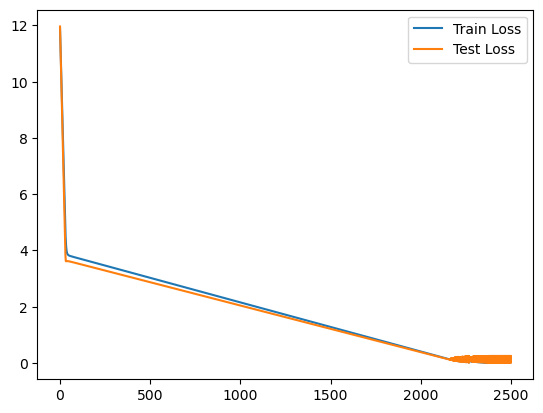

In [229]:
plt.plot(rangee,train_loss_vals,label = 'Train Loss')
plt.plot(rangee,test_loss_vals, label='Test Loss')
plt.legend()
plt.show()

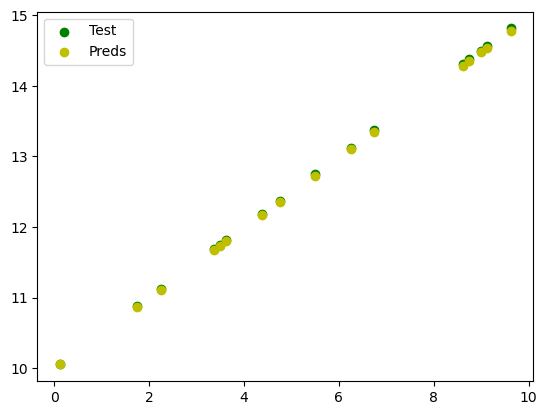

In [230]:
model1.eval()
with torch.inference_mode():
    predzz = model1(X_test)
    
plt.scatter(X_test,y_test,c='g',label='Test')
plt.scatter(X_test,predzz,c='y',label='Preds')
plt.legend()
plt.show()